In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.read_csv('../data/processed/combined_data.csv')

In [4]:
df

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2022-12-12 20:34:09.893,2,esrv.exe,0
1,2022-12-12 20:34:09.893,5,\DISPLAY1,0
2,2022-12-12 20:34:09.893,3,VsDebugConsole.exe,0
3,2022-12-12 20:34:09.893,4,ConsoleWindowClass,0
4,2022-12-12 20:34:12.896,2,(80) AMD Radeon RX 7900 XTX Review & GPU Bench...,0
...,...,...,...,...
37245,2023-02-07 03:49:39.717,5,\DISPLAY1,0
37246,2023-02-07 03:49:48.532,2,Chrome Legacy Window,0
37247,2023-02-07 03:49:48.532,3,LeagueClientUx.exe,0
37248,2023-02-07 03:49:48.532,4,Chrome_RenderWidgetHostHWND,0


In [5]:
df['MEASUREMENT_TIME'] = pd.to_datetime(df['MEASUREMENT_TIME'])
df['MEASUREMENT_TIME'].dt.date.unique()

array([datetime.date(2022, 12, 12), datetime.date(2022, 12, 13),
       datetime.date(2022, 12, 14), datetime.date(2022, 12, 15),
       datetime.date(2022, 12, 16), datetime.date(2022, 12, 17),
       datetime.date(2022, 12, 18), datetime.date(2022, 12, 19),
       datetime.date(2022, 12, 20), datetime.date(2022, 12, 21),
       datetime.date(2022, 12, 22), datetime.date(2022, 12, 23),
       datetime.date(2023, 1, 9), datetime.date(2023, 1, 10),
       datetime.date(2023, 1, 11), datetime.date(2023, 1, 13),
       datetime.date(2023, 1, 14), datetime.date(2023, 1, 15),
       datetime.date(2023, 1, 16), datetime.date(2023, 1, 17),
       datetime.date(2023, 1, 18), datetime.date(2023, 1, 19),
       datetime.date(2023, 1, 20), datetime.date(2023, 1, 21),
       datetime.date(2023, 1, 24), datetime.date(2023, 1, 25),
       datetime.date(2023, 1, 26), datetime.date(2023, 1, 27),
       datetime.date(2023, 1, 31), datetime.date(2023, 2, 1),
       datetime.date(2023, 2, 2), datetime.da

Data collection period:
2022/12/12 ~ 2022/12/23,
2023/1/9   ~ 2023/2/6

### EDA on .exe

In [6]:
exe_value_counts = df[df['ID_INPUT'] == 3]['VALUE'].value_counts()
exe_value_counts

firefox.exe                                                      2716
LeagueClientUx.exe                                               1528
explorer.exe                                                     1136
League of Legends.exe                                             703
chrome.exe                                                        557
                                                                 ... 
PowerToys.FancyZonesEditor.exe                                      1
msedgewebview2.exe                                                  1
MozillaDialogClass                                                  1
SplashScreenClassName                                               1
CodeSetup-stable-e8a3071ea4344d9d48ef8a4df2c097372b0c5161.tmp       1
Name: VALUE, Length: 85, dtype: int64

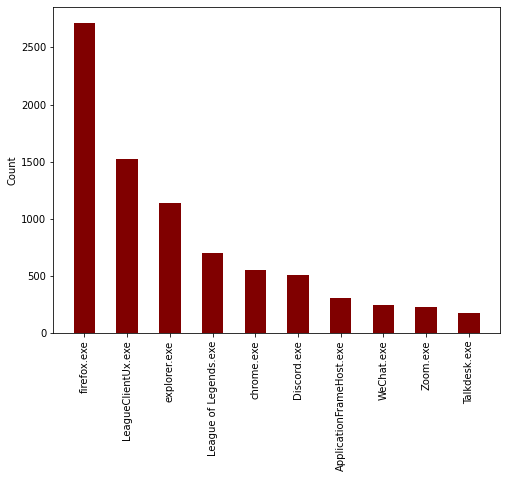

In [7]:
plt.figure(figsize=(8, 6))
plt.bar(exe_value_counts.index[:10], exe_value_counts.values[:10], color ='maroon',
        width = 0.5)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [8]:
exe_value_counts.index.unique()

Index(['firefox.exe', 'LeagueClientUx.exe', 'explorer.exe',
       'League of Legends.exe', 'chrome.exe', 'Discord.exe',
       'ApplicationFrameHost.exe', 'WeChat.exe', 'Zoom.exe', 'Talkdesk.exe',
       'Teams.exe', 'WindowsCamera.exe', 'RiotClientUx.exe', 'onenoteim.exe',
       'cmd.exe', 'SearchApp.exe', 'devenv.exe', 'DB Browser for SQLite.exe',
       'OUTLOOK.EXE', 'ShellExperienceHost.exe', 'EXCEL.EXE',
       'ScreenClippingHost.exe', 'Microsoft.Photos.exe', 'notepad++.exe',
       'MozillaWindowClass', 'audacity.exe', 'Spotify.exe', 'notepad.exe',
       'VsDebugConsole.exe', 'steamwebhelper.exe', 'steam.exe',
       'StartMenuExperienceHost.exe', 'LeagueClient.exe', 'WechatBrowser.exe',
       'slack.exe', 'obs64.exe', 'EpicGamesLauncher.exe', 'Acrobat.exe',
       'Chrome_WidgetWin_1', 'vlc.exe', 'Microsoft.AAD.BrokerPlugin.exe',
       'MSTaskListWClass', 'Yakuza0.exe', 'msedge.exe', 'vpnui.exe',
       'Code.exe', 'Chrome_RenderWidgetHostHWND', 'iCloud.exe',
       'Wind

Firefox has the most usage

### EDA on time

In [8]:
hour_counts = df['MEASUREMENT_TIME'].dt.hour.value_counts()

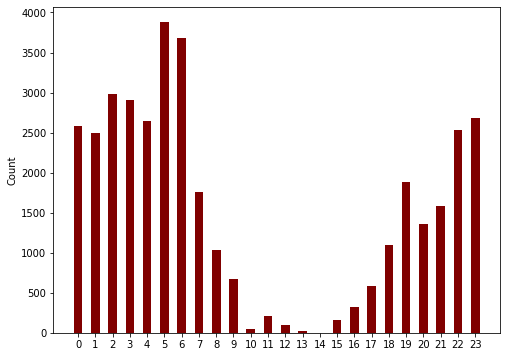

In [9]:
plt.figure(figsize=(8, 6))
plt.bar(hour_counts.index, hour_counts.values, color ='maroon',
        width = 0.5)

plt.ylabel('Count')
plt.xticks(np.arange(0, 24))
plt.show()

User dedicates most of their time during late nights and early morning

### EDA on Display

In [10]:
display = df[df['ID_INPUT'] == 5]
display['VALUE'].unique()

array(['\\DISPLAY1', '\\DISPLAY9'], dtype=object)

Two displays being used

In [11]:
display['Date'] = display['MEASUREMENT_TIME'].dt.date
display_counts = display.groupby(['Date', 'VALUE']).count().unstack(fill_value=0).stack().reset_index()

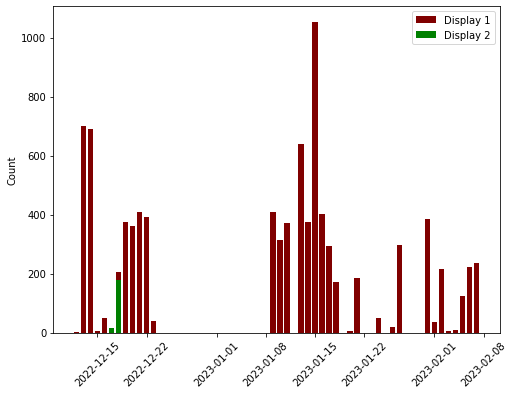

In [12]:
plt.figure(figsize=(8, 6))
display1_counts = display_counts[display_counts['VALUE'] == '\DISPLAY1']
display9_counts = display_counts[display_counts['VALUE'] == '\DISPLAY9']
plt.bar(display1_counts['Date'], display1_counts['MEASUREMENT_TIME'], color='maroon', label='Display 1')
plt.bar(display9_counts['Date'], display9_counts['MEASUREMENT_TIME'], color='green', label='Display 2')
plt.tick_params(axis='x', labelrotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()

User mostly uses one display and sometimes uses the other one. It is also a plot for number of changes of foreground windows per day.